In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

## Gráfico de dispersão categórico

A representação padrão dos dados ``catplot()`` usa um gráfico de dispersão. Na verdade, existem dois gráficos de dispersão categóricos diferentes. Eles adotam abordagens diferentes para resolver o principal desafio ao representar dados categóricos com um gráfico de dispersão, ou seja, todos os pontos pertencentes a uma categoria cairiam na mesma posição ao longo do eixo correspondente à variável categórica. A abordagem usada por ``stripplot()``, que é o “tipo” padrão, ``catplot()`` é ajustar as posições dos pontos no eixo categórico com uma pequena quantidade de “jitter” aleatório:


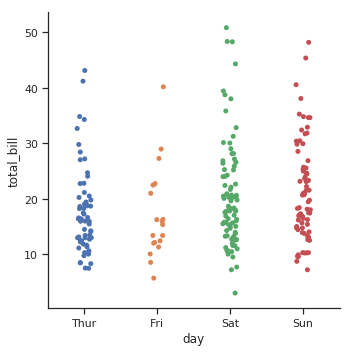

In [2]:
tips = sns.load_dataset("tips")
sns.catplot(x="day", y="total_bill", data=tips);

O ``jitter`` parâmetro controla a magnitude do jitter ou o desativa:

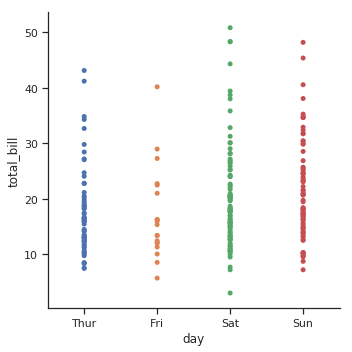

In [3]:
sns.catplot(x="day", y="total_bill", jitter=False, data=tips);

## Boxplot

Este tipo de gráfico mostra os três valores quartil da distribuição, juntamente com valores extremos. Os "whiskers" estendem-se a pontos que estão dentro de 1,5 IQRs do quartil inferior e superior e, em seguida, as observações que caem fora desse intervalo são exibidas de forma independente. Isso significa que cada valor no boxplot corresponde a uma observação real nos dados.

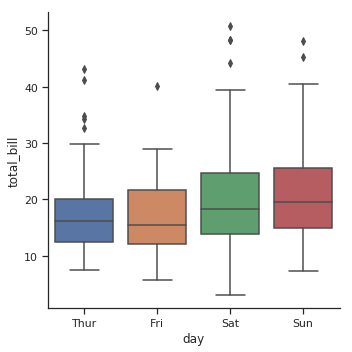

In [4]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips);

Ao adicionar uma ``hue`` semântica, a caixa para cada nível da variável semântica é movida ao longo do eixo categórico para que não se sobreponham:

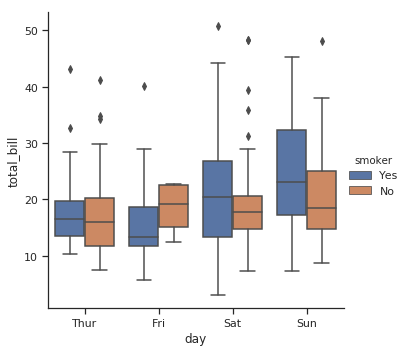

In [5]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips);

## Gráfico de Violino

O ``violinplot()``, que combina um boxplot com o procedimento de estimativa de densidade do kernel descrito no tutorial de distribuições :

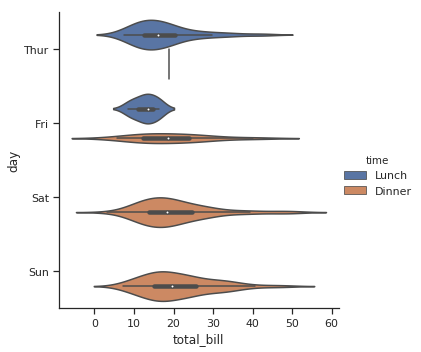

In [6]:
sns.catplot(x="total_bill", y="day", hue="time",
            kind="violin", data=tips);

Também é possível “dividir” os violinos quando o parâmetro matiz tiver apenas dois níveis, o que pode permitir um uso mais eficiente do espaço:

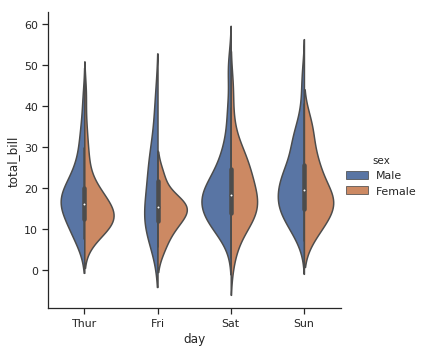

In [7]:
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", split=True, data=tips);

Existem várias opções para o gráfico desenhado no interior dos violinos, incluindo maneiras de mostrar cada observação individual em vez dos valores de resumo do boxplot:

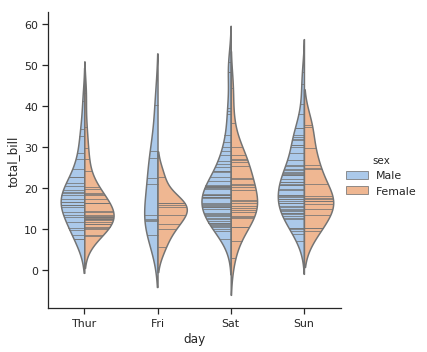

In [8]:
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", inner="stick", split=True,
            palette="pastel", data=tips);

Também pode ser útil combinar ``swarmplot()`` ou ``striplot()`` com um gráfico de caixa ou gráfico de violino para mostrar cada observação junto com um resumo da distribuição:

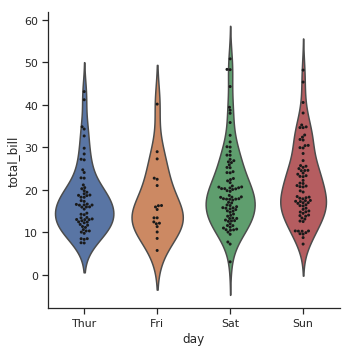

In [9]:
g = sns.catplot(x="day", y="total_bill", kind="violin", inner=None, data=tips)
sns.swarmplot(x="day", y="total_bill", color="k", size=3, data=tips, ax=g.ax);

## Gráficos de Barra

Em seaborn, o ``barplot()`` opera em um conjunto de dados completo e aplica uma função para obter a estimativa (tomando a média por padrão). Quando há múltiplas observações em cada categoria, ela também usa bootstrapping para calcular um intervalo de confiança em torno da estimativa e plota que usando barras de erro:

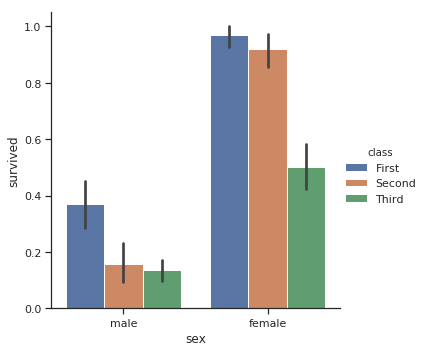

In [10]:
titanic = sns.load_dataset("titanic")
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic);

Um caso especial para o gráfico de barras é quando você deseja mostrar o número de observações em cada categoria, em vez de calcular uma estatística para uma segunda variável. Isso é semelhante a um histograma sobre uma variável categórica, em vez de quantitativa. No ``Seaborn``, é fácil fazê-lo com a ``countplot()``:

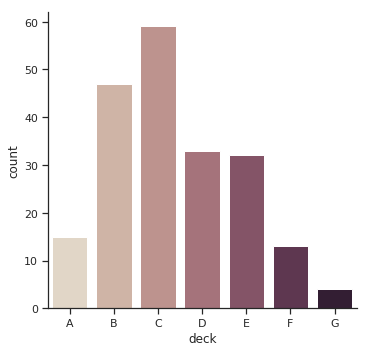

In [11]:
sns.catplot(x="deck", kind="count", palette="ch:.25", data=titanic);

Ambos ``barplot()`` e ``countplot()`` podem ser invocados com todas as opções discutidas acima, junto com outras que são demonstradas na documentação detalhada de cada função:

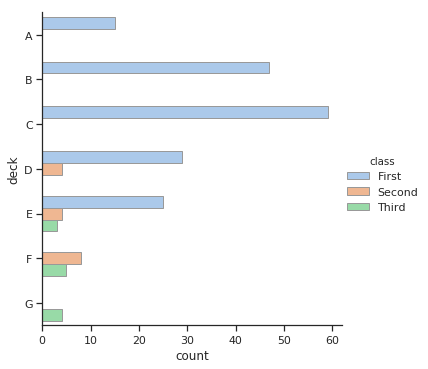

In [12]:
sns.catplot(y="deck", hue="class", kind="count",
            palette="pastel", edgecolor=".6",
            data=titanic);